# Aula 2 - Introdução as Redes Neurais

No segundo encontro da nossa temporada de Tensorflow de 2022 iremos introduzir, de maneira prática, uma rede neural de múltiplas camadas, também conhecida como *Multi layer perceptron*.

Para construirmos a nossa rede teremos que nos preocupar em escrever as seguintes implementações:

- Neurônio
- Função de ativação
- Função de *loss* ou perda
- Feed foward
- Backpropagation

Para fazermos tudo isso, é muito importante estarmos familiarizados com operações matriciais. Por isso, iremos revisá-las antes de implementar a rede.

In [ ]:
import numpy as np

np.random.seed(seed=42)

## Operações Matricias - Revisão


Quando estamos falando de redes neurais, estamos falando de muitos dados, muitas camadas e muitas operações. Nossos dados e camadas podem ser vistos como uma matriz e, sendo assim, o jeito mais fácil de realizar operações entre eles é utilizando técnicas matriciais.

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.32.19-PM.png)

A operação mais comum, ao longo de toda a rede, é a multiplicação matricial.

![operacao matricial](https://www.somatematica.com.br/emedio/matrizes/Image37.gif)

## Derivada - Revisão

Podemos entender, de forma bastante simplista, como a taxa de variação em um pequeno intervalo.

![](https://upload.wikimedia.org/wikipedia/commons/3/37/Graph_of_sliding_derivative_line_no_text.gif?20181001063527)

Vamos ver um exemplo com o dólar!

### Regra da cadeia

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)

## Neurônio - Revisão

Como vimos na aula passada, um neurônio é definido como um componente da rede que recebe uma entrada (*input*), multiplica essa entrada por um conjunto de pesos, soma o resultado e aplica uma função de ativação nesse resultado. Dessa forma, para definirmos um neurônio precisamos:

- Pesos associados
- Função de ativação

![](https://miro.medium.com/max/428/1*O7YSSqlOdQuNgMrH7J_3dg.png)

## Função de ativação

As funções de ativação, como visto na aula passada, são as funções responsáveis por permitir que a rede neural consiga distorcer/compor soluções finais complexas que conseguem resolver o problema. Temos vários tipos de funções de ativação como:

- Linear
- Sigmóide
- Tangente hiperbólica
- ReLu (*Rectified Linear Unit*)

Hoje, para resolvermos o problema da previsão de vendas, iremos utilizar a função sigmóide e linear.

### Sigmóide

A sigmóide é dada pela seguinte função:

$$\phi(z) = \frac{1}{1+e^{-z}}$$

<br>
<br>

![](https://www.dobitaobyte.com.br/wp-content/uploads/2018/12/sigmoid.png)

#### Derivada da sigmoide

$$\phi'(z) = \phi(z)(1-\phi(z))$$

In [ ]:
class Sigmoide():
  def ativar(self, entrada):
    return 1 / (1 + np.exp(-entrada))

  def derivada(self, entrada):
    return self.ativar(entrada) * (1 - self.ativar(entrada))

In [ ]:
# Quando a entrada é 0, o valor deve ser 0.5
entrada = 0
Sigmoide().ativar(entrada)

0.5

In [ ]:
entrada = 7
Sigmoide().ativar(entrada)

0.9990889488055994

### Linear

A função linear que usamos aqui também é conhecida como função identidade. Ela é expressa por:

$$f(x) = x$$

<br>
<br>

![](http://mathonline.wdfiles.com/local--files/the-identity-function/Screen%20Shot%202015-09-07%20at%203.04.15%20PM.png)

#### Derivada da linear

$$f'(x) = 1$$

In [ ]:
class Linear():
  def ativar(self, entrada):
    return entrada

  def derivada(self, entrada):
    return np.ones(entrada.shape)

In [ ]:
entrada = 7
Linear().ativar(entrada)

7

## Neurônio



Além disso, é muito comum que uma mesma camada da rede, ou seja, múltiplos neurônios, façam uso da mesma função de ativação, variando apenas os pesos associados. Dessa forma, ao invés de implementarmos apenas UM neurônio faremos a implementação de uma camada.

In [ ]:
class Camada():
  def __init__(self, qtd_entrada, qtd_saida, funcao_ativacao, pesos=None):

    if pesos is None:
      self.pesos = np.random.normal(0.0, 1.0, (qtd_entrada, qtd_saida))
    else:
      self.pesos = pesos
    self.funcao_ativacao = funcao_ativacao
    self.delta_peso = None
    self._entrada = None
    self._saida_linear = None
    self._ativacao = None
  
  def propagar(self, entrada):
    self._entrada = entrada # a
    self._saida_linear = np.dot(self._entrada, self.pesos) # z
    self._ativacao = self.funcao_ativacao.ativar(self._saida_linear)

    return self._ativacao

Vamos construir nossa primeira camada!
Queremos fazer uma camada com dois neurônio, função de ativação sigmoidal e pesos iguais a zero.

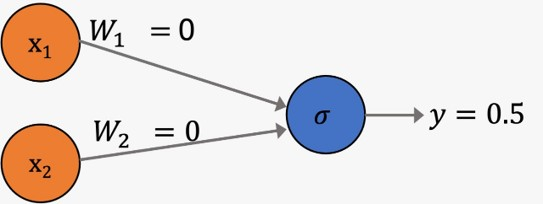

In [ ]:
primeira_camada = Camada(2, 1, Sigmoide(), pesos=np.array([[0], [0]]))

In [ ]:
primeira_camada.propagar(np.array([[1,2]]))

array([[0.5]])

## Rede Neural

Uma rede neural é composta por uma ou mais camadas e uma função de perda, que nos ajuda a estimar o erro da nossa rede e ir melhorando a fim de diminuí-lo. Sendo assim, iremos agora definir nossa rede e também algumas funções de perda.

### Função de perda

A função de perda, também chamada de função de erro, é uma função que avalia quão bem ou mal um algoritmo performa em um conjunto de dados. É utilizada para determinar o erro (*loss*) entre o valor predito e o valor real.

#### Mean Squared Error

##### Fórmula

$$MSE = \frac{1}{n}\sum_{n=1}^{i} (y_i - \hat{y}_i)^2$$

##### Derivada

$$\frac{\partial MSE}{\partial \hat{y}} = - (y - \hat{y})$$

In [ ]:
class MSE():
  def erro(self, valores_reais, predicoes):
    return np.mean((valores_reais - predicoes) ** 2)
  
  def derivada(self, valores_reais, predicoes):
    return -(valores_reais - predicoes)

#### Mean absolute error

##### Fórmula

$$MAE = \frac{1}{n}\sum_{n=1}^{i} |y_i - \hat{y}_i|$$

##### Derivada

\begin{align}
        \text{$\frac{\partial MAE}{\partial \hat{y}}$} = \left\{
        \begin{array}{cl}
        1 & \hat{y} > y \\
        -1 & \hat{y} \leq y
        \end{array}
        \right.
    \end{align}

In [ ]:
class MAE():
  def erro(self, valores_reais, predicoes):
    return np.mean(np.abs(valores_reais - predicoes))
  
  def derivada(self, valores_reais, predicoes):
    resultado_filtro = predicoes > valores_reais
    return 2 * resultado_filtro - 1

### Backpropagation

Acrônimo para "backward propagation errors", consiste em ajustar os parâmetros, ou pesos, de uma rede neural a fim de obter a saída predita mais próxima do *target* desejado.

O ajuste é feito de acordo com a contribuição do parâmetro ajustado para o erro final. Essa contribuição é obtida através do gradiente da rede, sendo que o gradiente é o conjunto de todas as derivadas parciais da minha rede neural em relação aos erros

O gradiente de uma função $f$ é o vetor composto pelas derivadas parciais dessa função e ele indica para qual direção a função **CRESCE**:

$$\nabla f(p) = \left[\frac{\partial f}{\partial x_1}(p), \frac{\partial f}{\partial x_2}(p) \dots \frac{\partial f}{\partial x_n}(p)\right]$$




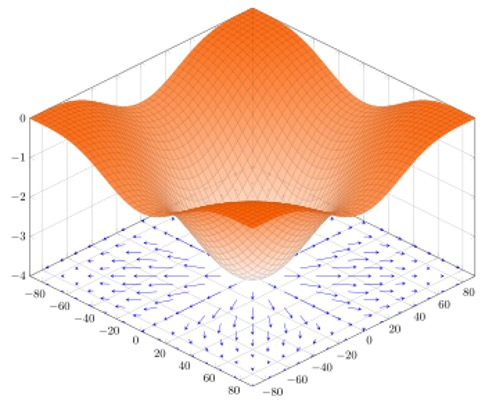

Para implementarmos a nossa rede neural vamos precisar calcular a derivada do erro em relação aos pesos de cada camada. Sendo assim, para a última camada temos:

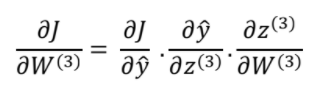

Já para a penúltima camada, temos:

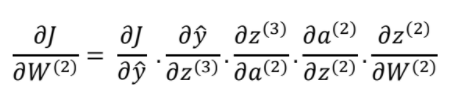

Para a antepenúltima teríamos:

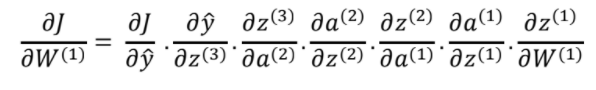

E assim por diante.

Referências: https://www.youtube.com/watch?v=tIeHLnjs5U8



### MLP

Agora que já temos tudo para montar uma rede neural do tipo MLP, só falta juntar!

In [ ]:
class MLP():
  def __init__(self, camadas, loss):
    self.camadas = camadas
    self.loss = loss
  
  def predizer(self, entrada):
    entrada_ = entrada
    for camada in self.camadas:
      entrada_ = camada.propagar(entrada_)
    return entrada_
  
  def _backpropagation(self, valores_reais, predicoes):
    resultado_anterior = self.loss.derivada(valores_reais, predicoes)
    for camada in reversed(self.camadas):
      parcial = resultado_anterior * camada.funcao_ativacao.derivada(camada._saida_linear)
      camada.delta_peso = np.dot(camada._entrada.T, parcial) / camada._entrada.shape[1]
      resultado_anterior = np.dot(parcial, camada.pesos.T)
        
  def treinar(self, entrada, target, epocas, taxa_aprendizado):
    for epoca in range(epocas):
      saida = self.predizer(entrada)
      erro = self.loss.erro(target, saida)
      if epoca % 10 == 0:
        print(f'Época {epoca}: {erro}')
      self._backpropagation(target, saida)
      for camada in self.camadas:
        camada.pesos -= taxa_aprendizado * camada.delta_peso

### Será que a rede aprende a somar?

In [ ]:
x1 = np.random.randint(100, size=100).reshape(100, -1)
x2 = np.random.randint(100, size=100).reshape(100, -1)
X = np.concatenate([x1, x2], axis=1)
y = x1 + x2

In [ ]:
X[:5], y[:5]

(array([[51, 25],
        [92, 88],
        [14, 59],
        [71, 40],
        [60, 28]]), array([[ 76],
        [180],
        [ 73],
        [111],
        [ 88]]))

In [ ]:
rede = MLP([Camada(2, 2, Linear()), Camada(2, 1, Linear())], MAE())
rede.treinar(X, y, 1000, 0.000001)

Época 0: 107.83936090881194
Época 10: 101.78641428194834
Época 20: 95.75303932100479
Época 30: 89.71021069639477
Época 40: 83.62886458409093
Época 50: 77.47975887744809
Época 60: 71.23333257508965
Época 70: 64.85956366870917
Época 80: 58.32782484758646
Época 90: 51.60673632627898
Época 100: 44.664015088279456
Época 110: 37.46631982136108
Época 120: 31.02315158134331
Época 130: 25.86772309478787
Época 140: 21.22836360574073
Época 150: 17.89796737212842
Época 160: 16.14945654631849
Época 170: 15.062405268114176
Época 180: 14.371548636812323
Época 190: 13.902287230833524
Época 200: 13.547918319065518
Época 210: 13.255847321191757
Época 220: 12.986381617755756
Época 230: 12.719864371648109
Época 240: 12.455973523007172
Época 250: 12.194650993437065
Época 260: 11.935650761246823
Época 270: 11.679033147773243
Época 280: 11.424663768286457
Época 290: 11.17248250447017
Época 300: 10.922469992789315
Época 310: 10.674489614522424
Época 320: 10.428452282098755
Época 330: 10.184232367822954
Época 

In [ ]:
rede.predizer(np.array([[200, 300]]))

array([[497.02350443]])

## Resolvendo o problema de vendas dado o tipo de propaganda

Na última aula, falamos de um problema onde queriamos prever a quantidade de venda com base no investimento feito em três canais de propaganda: Rádio, TV e Jornal. Hoje, vamos utilizar a rede que fizemos para tentar resolver esse problema.

### Download dos dados

In [ ]:
import gdown
import pandas as pd

url = "https://drive.google.com/uc?id=12TaztZ5sVeuGymAJghhWenTGJ6kJQroc"
output = "/content/Advertising.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12TaztZ5sVeuGymAJghhWenTGJ6kJQroc
To: /content/Advertising.csv
100%|██████████| 5.17k/5.17k [00:00<00:00, 4.64MB/s]


'/content/Advertising.csv'

### Leitura dos dados

In [ ]:
df_advertising = pd.read_csv('Advertising.csv', index_col = 0)
df_advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X = df_advertising[['TV', 'Radio', 'Newspaper']].values
y = df_advertising[['Sales']].values

### Definição da nossa rede

In [ ]:
np.random.seed(42)
rede = MLP(
    [
     Camada(3, 5, Sigmoide()),
     Camada(5, 10, Sigmoide()),
     Camada(10, 1, Linear())
    ],
     MSE())

In [ ]:
rede.treinar(X, y, 500, 0.01)

Época 0: 194.87792658928865
Época 10: 21.77930862228444
Época 20: 22.865022230933377
Época 30: 20.70585757297583
Época 40: 23.090870320883088
Época 50: 20.67148910504968
Época 60: 20.352684441649586
Época 70: 20.34953424506274
Época 80: 20.348982284214795
Época 90: 20.34882638882719
Época 100: 20.34875988183788
Época 110: 20.34871807998033
Época 120: 20.348686002376372
Época 130: 20.34865947078613
Época 140: 20.348636864571635
Época 150: 20.34861729637916
Época 160: 20.34860016817832
Época 170: 20.3485850385699
Época 180: 20.34857156855269
Época 190: 20.348559492021266
Época 200: 20.348548596837425
Época 210: 20.348538711724867
Época 220: 20.348529696854552
Época 230: 20.34852143692882
Época 240: 20.348513836015645
Época 250: 20.34850681363535
Época 260: 20.348500301758804
Época 270: 20.34849424247841
Época 280: 20.348488586182135
Época 290: 20.348483290108078
Época 300: 20.348478317190015
Época 310: 20.348473635127526
Época 320: 20.34846921563131
Época 330: 20.348465033805972
Época 34

### Comparando com a implementação de MLP do sklearn

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor((5, 10), activation='logistic',
                   learning_rate_init=0.01, max_iter=500,
                   batch_size=X.shape[0], shuffle=False,
                   solver='sgd', n_iter_no_change=500,
                   momentum=0, random_state=42,
                   alpha=0)
mlp.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(activation='logistic', alpha=0, batch_size=200,
             hidden_layer_sizes=(5, 10), learning_rate_init=0.01, max_iter=500,
             momentum=0, n_iter_no_change=500, random_state=42, shuffle=False,
             solver='sgd')

In [ ]:
mean_squared_error(y, mlp.predict(X))

19.02235433425438

### Bônus: Comparando com uma regressão linear simples

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
mean_squared_error(y, lr.predict(X))

2.784126314510936